# SVM

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('..\\data\\data_cleaned.csv')

model = SVC(kernel='linear', random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)



# Definisco features
features = ['wind_direction', 'Wind Speed', 'concentration', 'azimuth_degrees']
# Definisco target
target = 'distance'

# Informazioni sui dati
print("Shape of the dataset:", df.shape)
print("Classi target:", sorted(y.unique()))
print('Distribution of target classes:', y.value_counts().sort_index())





Shape of the dataset: (3071, 9)
Classi target: [np.int64(50), np.int64(100), np.int64(200)]
Distribution of target classes: distance
50     1223
100    1025
200     823
Name: count, dtype: int64


In [30]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dei dati
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validation scores:", scores)



Cross-validation scores: [0.52439024 0.48065173 0.46435845 0.44399185 0.50305499]


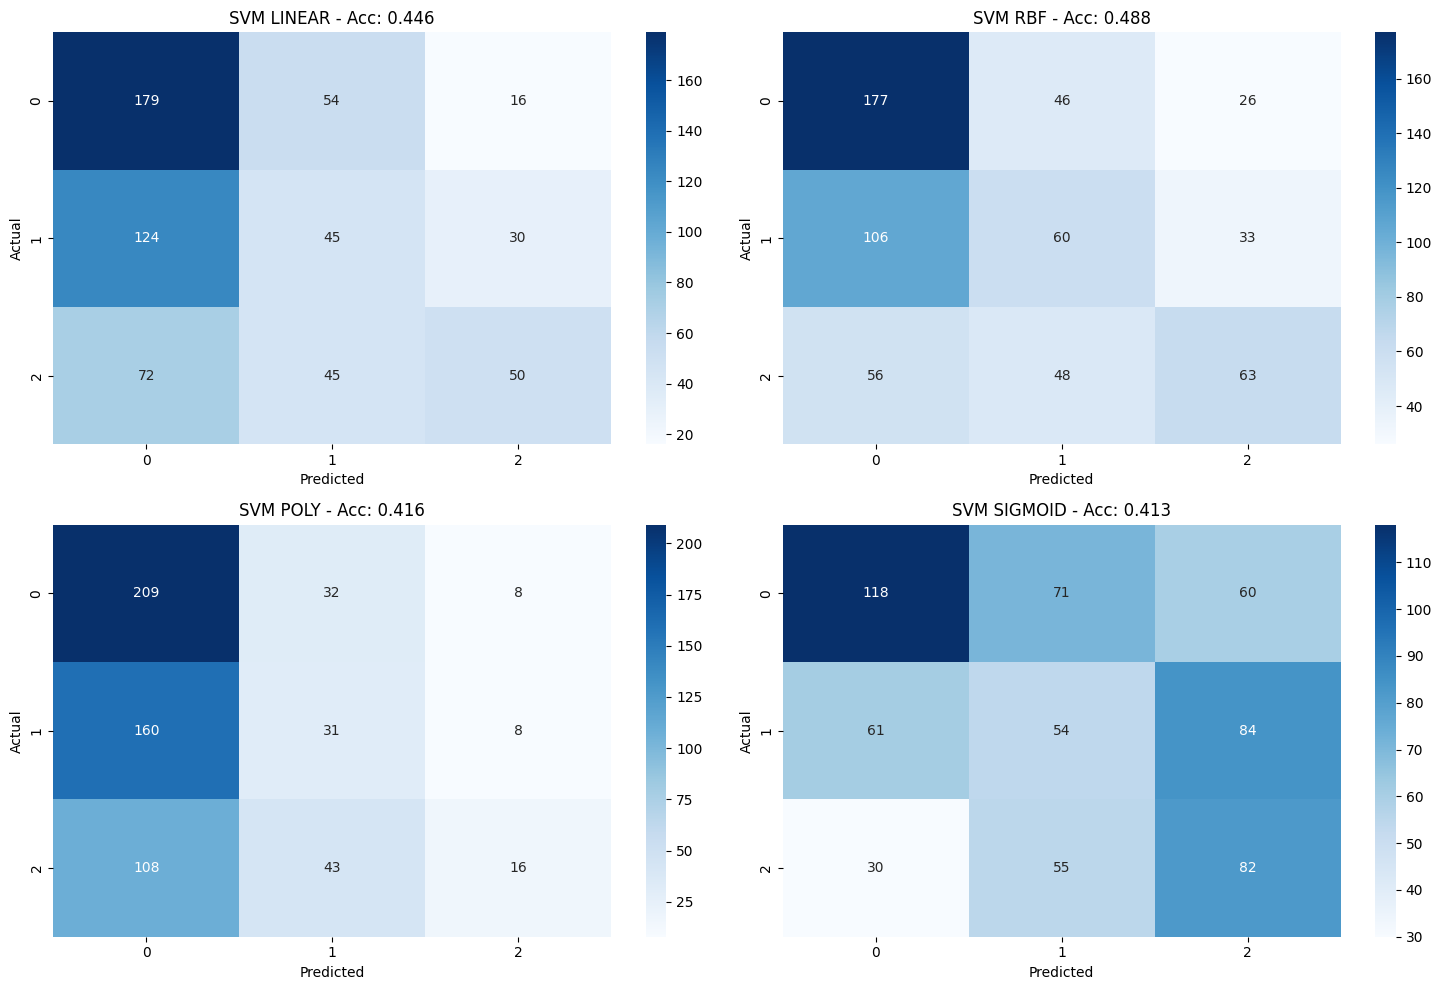

=== CONFRONTO KERNEL SVM ===
LINEAR:
  CV Accuracy: 0.4776 ± 0.0098
  Test Accuracy: 0.4455

RBF:
  CV Accuracy: 0.5090 ± 0.0144
  Test Accuracy: 0.4878

POLY:
  CV Accuracy: 0.4349 ± 0.0139
  Test Accuracy: 0.4163

SIGMOID:
  CV Accuracy: 0.4096 ± 0.0144
  Test Accuracy: 0.4130



In [25]:
# Confronto di diversi kernel SVM
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_results = {}

plt.figure(figsize=(15, 10))

for i, kernel in enumerate(kernels):
    # Modello con kernel specifico
    svm = SVC(kernel=kernel, random_state=42, probability=True)
    
    # Cross-validation
    new_var = svm
    cv_scores = cross_val_score(new_var, X_train, y_train, cv=5, scoring='accuracy')
    
    # Fit e test
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    svm_results[kernel] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_accuracy,
        'model': svm
    }
    
    # Confusion matrix
    plt.subplot(2, 2, i+1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'SVM {kernel.upper()} - Acc: {test_accuracy:.3f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Riepilogo risultati
print("=== CONFRONTO KERNEL SVM ===")
for kernel, results in svm_results.items():
    print(f"{kernel.upper()}:")
    print(f"  CV Accuracy: {results['cv_mean']:.4f} ± {results['cv_std']:.4f}")
    print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    print()